#AG2 - Actividad Guiada 2

Nombre: Jorge Nozal Martín <br>
Link:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>




In [1]:
import math

##Problema de Asignacion de tarea

In [2]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [3]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [4]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [5]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [6]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [7]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [8]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random


Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [9]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

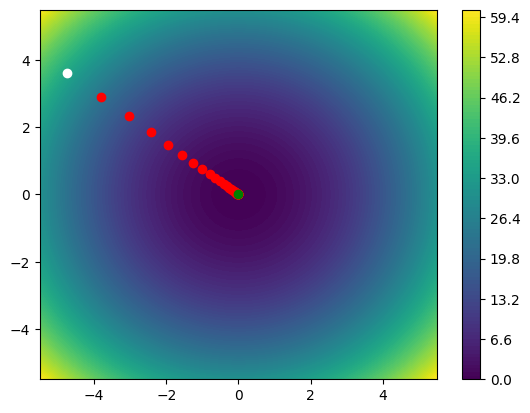

Solucion: [-6.797311014038953e-05, 5.177616530665974e-05] 7.301114996020082e-09


In [10]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

In [11]:
# 1. Definición de la función y su gradiente
def f(X):
    x, y = X
    return math.sin(1/2 * x**2 - 1/4 * y**2 + 3) * math.cos(2*x + 1 - math.exp(y))

def df(X):
    x, y = X
    # Términos comunes
    term1 = 1/2 * x**2 - 1/4 * y**2 + 3
    term2 = 2*x + 1 - math.exp(y)
    
    # Derivadas parciales
    dfx = x * math.cos(term1) * math.cos(term2) - 2 * math.sin(term1) * math.sin(term2)
    dfy = (-y/2) * math.cos(term1) * math.cos(term2) + math.exp(y) * math.sin(term1) * math.sin(term2)
    
    return np.array([dfx, dfy])


In [12]:
# 2. Configuración para visualización
resolucion = 200
rango = 5.5

# Preparamos los datos para el mapa de niveles
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
X_grid, Y_grid = np.meshgrid(X, Y)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Normalizamos Z para mejor visualización
Z = (Z - Z.min()) / (Z.max() - Z.min())

In [13]:
# 3. Algoritmo de descenso del gradiente mejorado
def gradient_descent(f, df, initial_point, learning_rate=0.01, max_iter=100, tol=1e-6, adaptive=False):
    P = initial_point.copy()
    trajectory = [P.copy()]
    costs = [f(P)]
    
    for i in range(max_iter):
        grad = df(P)
        
        # Tasa de aprendizaje adaptativa (opcional)
        if adaptive:
            current_lr = learning_rate / (1 + 0.01 * i)
        else:
            current_lr = learning_rate
            
        # Actualización
        P[0] -= current_lr * grad[0]
        P[1] -= current_lr * grad[1]
        
        trajectory.append(P.copy())
        costs.append(f(P))
        
        # Criterio de parada
        if np.linalg.norm(grad) < tol:
            break
            
    return np.array(trajectory), np.array(costs)



In [14]:

# 4. Ejecución desde un punto aleatorio
initial_point = np.array([random.uniform(-5, 5), random.uniform(-5, 5)])
trajectory, costs = gradient_descent(f, df, initial_point, learning_rate=0.01, max_iter=100, adaptive=True)

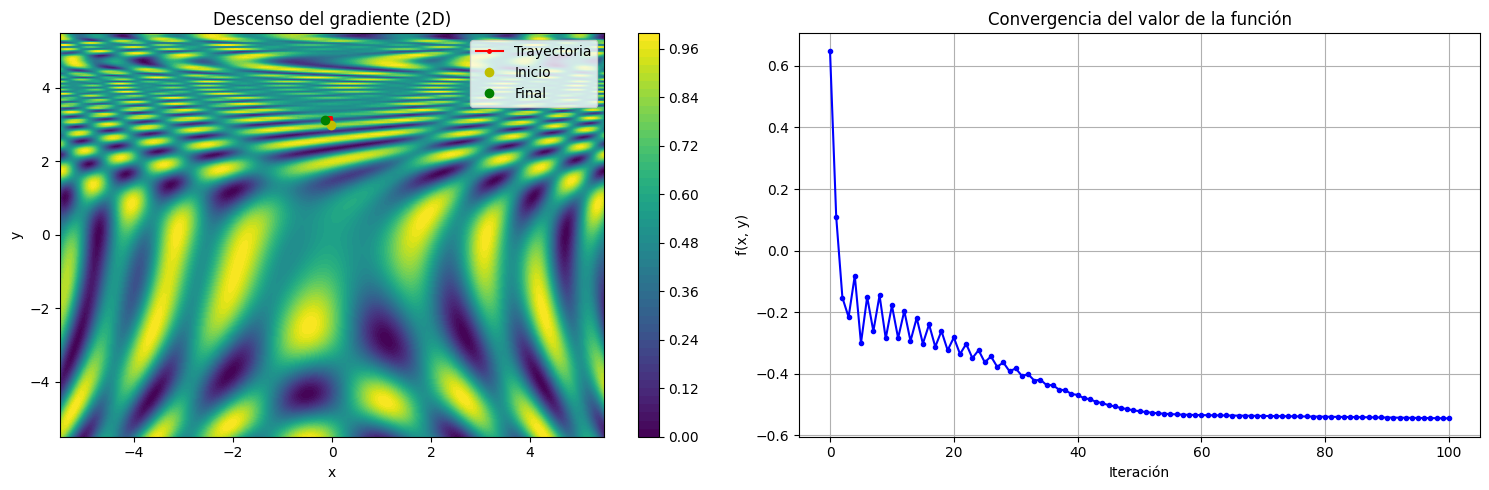


--- Resultados ---
Punto inicial: [-0.02114245  3.00154479]
Solución encontrada: [-0.14479253  3.11787507]
Valor mínimo de la función: -0.545268
Iteraciones realizadas: 100
Gradiente en el punto final: [0.23345799 0.02002029] (debe ser cercano a [0, 0])


In [15]:
# 5. Visualización en 2D y 3D
plt.figure(figsize=(15, 5))

# Gráfico 2D: Trayectoria
plt.subplot(1, 2, 1)
plt.contourf(X_grid, Y_grid, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', markersize=5, label='Trayectoria')
plt.plot(initial_point[0], initial_point[1], 'yo', label='Inicio')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'go', label='Final')
plt.title('Descenso del gradiente (2D)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Gráfico 2D: Convergencia
plt.subplot(1, 2, 2)
plt.plot(costs, 'b.-')
plt.xlabel('Iteración')
plt.ylabel('f(x, y)')
plt.title('Convergencia del valor de la función')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados finales
print("\n--- Resultados ---")
print(f"Punto inicial: {initial_point}")
print(f"Solución encontrada: {trajectory[-1]}")
print(f"Valor mínimo de la función: {f(trajectory[-1]):.6f}")
print(f"Iteraciones realizadas: {len(trajectory)-1}")
print(f"Gradiente en el punto final: {df(trajectory[-1])} (debe ser cercano a [0, 0])")